<a href="https://colab.research.google.com/github/GustavoUNAL/D-A_Converter/blob/main/RECURSO_SOLAR_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
print("****")
tensor_SFV = np.load('/content/drive/MyDrive/1. RecursoSolar/RNA/input_data_sol/tensor_SFV_sol.npy')
print("tensor_cargado.shape:")
print(tensor_SFV.shape)
print("****")
tensor_entradas = np.load('/content/drive/MyDrive/1. RecursoSolar/RNA/input_data_sol/input_tensor_sol.npy')
print("tensor_entradas.shape:")
print(tensor_entradas.shape)
print("****")



****
tensor_cargado.shape:
(365, 157, 1)
****
tensor_entradas.shape:
(365, 157, 3)
****


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [4]:
# Aplanar los tensores para que cada día sea un vector único de entradas
tensor_entradas_flatten = tensor_entradas.reshape(tensor_entradas.shape[0], -1)
tensor_SFV_flatten = tensor_SFV.reshape(tensor_SFV.shape[0], -1)


In [5]:
print(tensor_entradas_flatten.shape)
print(tensor_SFV_flatten.shape)

(365, 471)
(365, 157)


In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tensor_entradas_flatten, tensor_SFV_flatten, test_size=0.05, random_state=42)


In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(346, 471)
(19, 471)
(346, 157)
(19, 157)


In [8]:
# Definir el modelo
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(y_train.shape[1])  # 288 valores de salida
])

In [9]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


In [10]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
11/11 [==============================] - 4s 64ms/step - loss: 0.0794 - mean_absolute_error: 0.2051 - val_loss: 0.0380 - val_mean_absolute_error: 0.1504
Epoch 2/20
11/11 [==============================] - 0s 21ms/step - loss: 0.0327 - mean_absolute_error: 0.1366 - val_loss: 0.0326 - val_mean_absolute_error: 0.1372
Epoch 3/20
11/11 [==============================] - 0s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.1254 - val_loss: 0.0304 - val_mean_absolute_error: 0.1301
Epoch 4/20
11/11 [==============================] - 0s 38ms/step - loss: 0.0265 - mean_absolute_error: 0.1187 - val_loss: 0.0291 - val_mean_absolute_error: 0.1289
Epoch 5/20
11/11 [==============================] - 0s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.1164 - val_loss: 0.0298 - val_mean_absolute_error: 0.1284
Epoch 6/20
11/11 [==============================] - 0s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.1151 - val_loss: 0.0280 - val_mean_absolute_error: 0.1247
Epoch 7/20
11/11 [====

In [11]:
# Evaluar el modelo en el conjunto de prueba
test_metrics = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_metrics[0]}')
print(f'Test Mean Absolute Error: {test_metrics[1]}')


1/1 [==============================] - 0s 40ms/step - loss: 0.0250 - mean_absolute_error: 0.1132
Test Loss: 0.025047320872545242
Test Mean Absolute Error: 0.11321493238210678


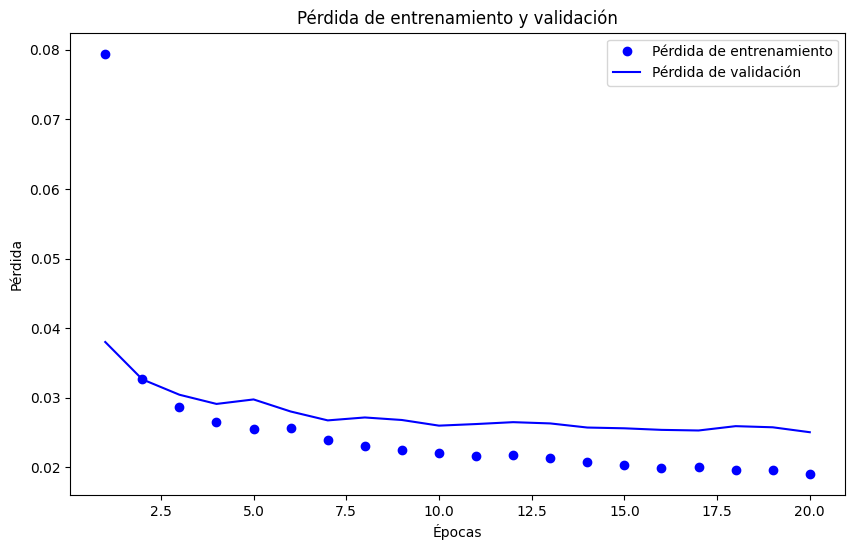

In [12]:
import matplotlib.pyplot as plt

# Extraer los valores de pérdida de entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


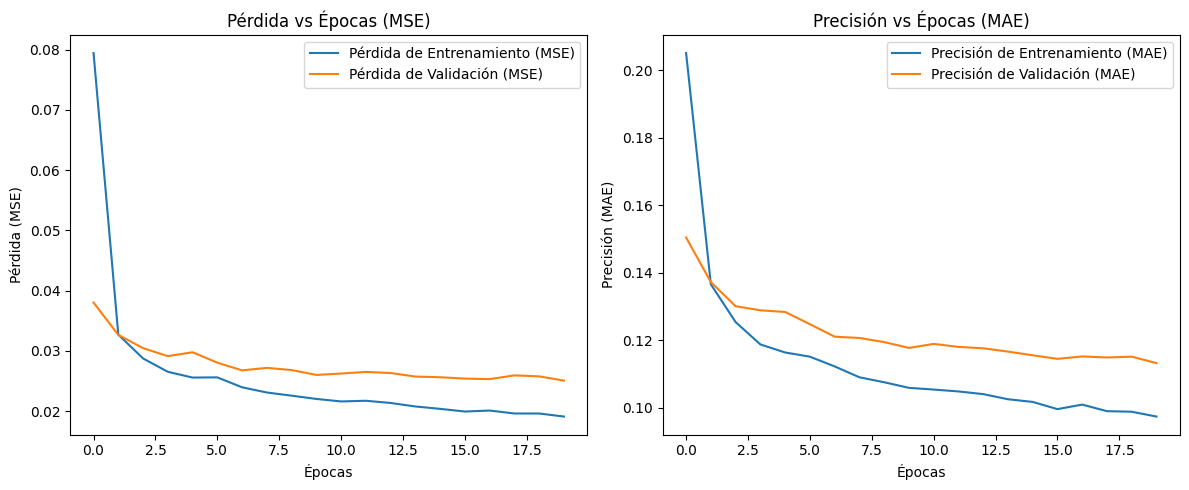

In [13]:
# Graficar la pérdida (mean_squared_error) y precisión (mean_absolute_error)
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Pérdida
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento (MSE)')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación (MSE)')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (MSE)')
    plt.legend()
    plt.title('Pérdida vs Épocas (MSE)')

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Precisión de Entrenamiento (MAE)')
    plt.plot(history.history['val_mean_absolute_error'], label='Precisión de Validación (MAE)')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión (MAE)')
    plt.legend()
    plt.title('Precisión vs Épocas (MAE)')

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_training_history(history)


1/1 [==============================] - 0s 41ms/step


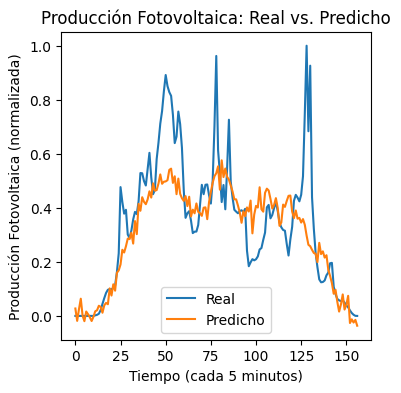

In [17]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Elegir un día aleatorio del conjunto de prueba para visualizar
day_index = np.random.randint(0, X_test.shape[0])  # Elegir un índice al azar

# Visualizar los valores reales vs. los predichos
plt.figure(figsize=(4, 4))
plt.plot(y_test[day_index], label='Real')
plt.plot(y_pred[day_index], label='Predicho')
plt.title('Producción Fotovoltaica: Real vs. Predicho')
plt.xlabel('Tiempo (cada 5 minutos)')
plt.ylabel('Producción Fotovoltaica (normalizada)')
plt.legend()
plt.show()


1/1 [==============================] - 0s 26ms/step


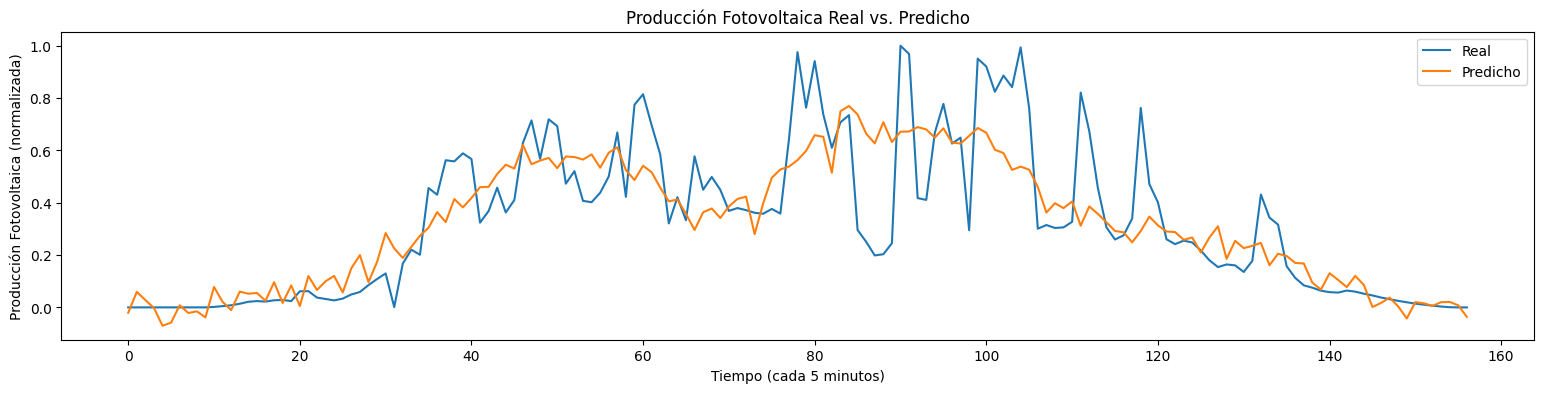

Producción fotovoltaica Real [kWh/día] = 52.062583632721584
Producción fotovoltaica Predicho [kWh/día] = 50.59218
Error porcentual: 2.82430333916595 %


In [ ]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Elegir un día aleatorio del conjunto de prueba para visualizar
day_index = np.random.randint(0, X_test.shape[0])  # Elegir un índice al azar


# Visualizar los valores reales vs. los predichos
plt.figure(figsize=(19, 4))
plt.plot(y_test[day_index], label='Real')
plt.plot(y_pred[day_index], label='Predicho')
plt.title('Producción Fotovoltaica Real vs. Predicho')
plt.xlabel('Tiempo (cada 5 minutos)')
plt.ylabel('Producción Fotovoltaica (normalizada)')
plt.legend()
plt.show()


# Energía SFV
energia_SFV = y_test[day_index]
print("Producción fotovoltaica Real [kWh/día] =",energia_SFV.sum())
# Energía Predicción
energia_pred = y_pred[day_index]
print("Producción fotovoltaica Predicho [kWh/día] =", energia_pred.sum())
# Error
error = abs(  energia_SFV.sum() - energia_pred.sum()) / energia_SFV.sum() * 100
print('Error porcentual:', error, '%')

In [ ]:
print(day_index)

16


1/1 [==============================] - 0s 43ms/step


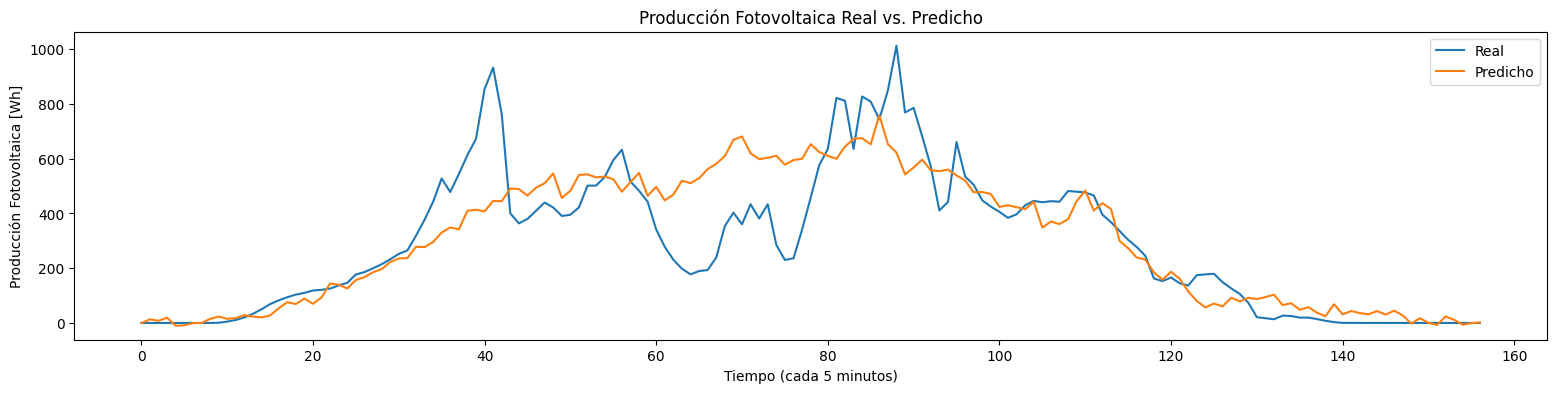

Producción fotovoltaica Real [kWh/día] = 45.982159999999986
Producción fotovoltaica Predicho [kWh/día] = 47.5434483757019
Error porcentual: 3.395421997796342 %


In [ ]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Elegir un día aleatorio del conjunto de prueba para visualizar
day_index = 12 # Elegir un índice al azar


# Visualizar los valores reales vs. los predichos
plt.figure(figsize=(19, 4))
plt.plot(y_test[day_index]*1013, label='Real')
plt.plot(y_pred[day_index]*1013, label='Predicho')
plt.title('Producción Fotovoltaica Real vs. Predicho')
plt.xlabel('Tiempo (cada 5 minutos)')
plt.ylabel('Producción Fotovoltaica [Wh]')
plt.legend()
plt.show()


# Energía SFV
energia_SFV = y_test[day_index]
print("Producción fotovoltaica Real [kWh/día] =",energia_SFV.sum()*1.013)
# Energía Predicción
energia_pred = y_pred[day_index]
print("Producción fotovoltaica Predicho [kWh/día] =", energia_pred.sum()*1.013)
# Error
error = abs(  energia_SFV.sum() - energia_pred.sum()) / energia_SFV.sum() * 100
print('Error porcentual:', error, '%')

## Análisis de los datos sin normalizar

1/1 [==============================] - 0s 24ms/step


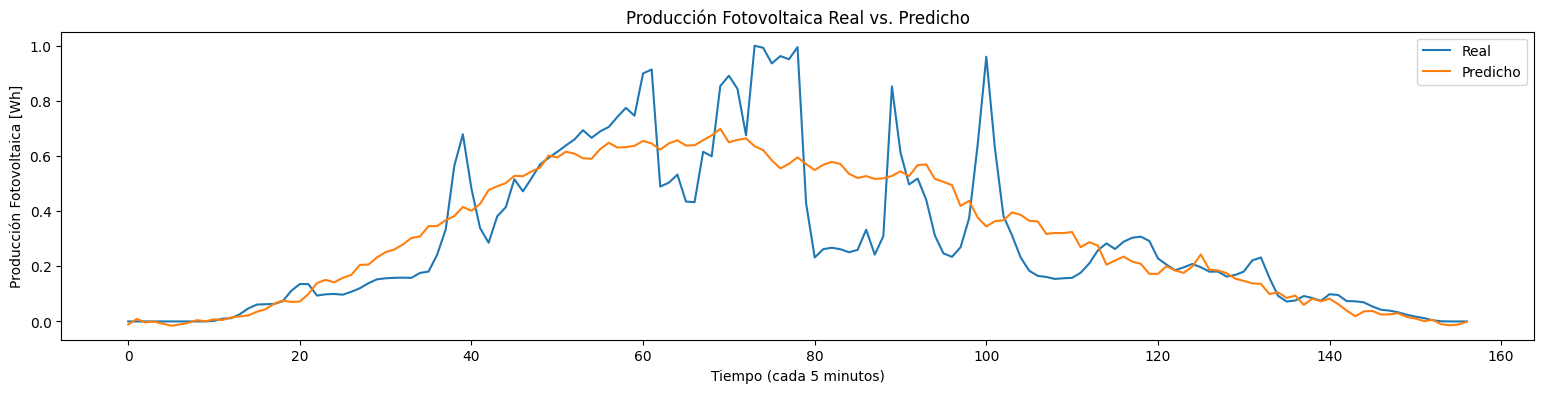

Producción fotovoltaica Real [kWh/día] = 48.038839608694275
Producción fotovoltaica Predicho [kWh/día] = 48.608105
Error porcentual: 1.185010091320449 %


In [ ]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Elegir un día aleatorio del conjunto de prueba para visualizar
day_index = 16 # Elegir un índice al azar


# Visualizar los valores reales vs. los predichos
plt.figure(figsize=(19, 4))
plt.plot(y_test[day_index], label='Real')
plt.plot(y_pred[day_index], label='Predicho')
plt.title('Producción Fotovoltaica Real vs. Predicho')
plt.xlabel('Tiempo (cada 5 minutos)')
plt.ylabel('Producción Fotovoltaica [Wh]')
plt.legend()
plt.show()


# Energía SFV
energia_SFV = y_test[day_index]
print("Producción fotovoltaica Real [kWh/día] =",energia_SFV.sum())
# Energía Predicción
energia_pred = y_pred[day_index]
print("Producción fotovoltaica Predicho [kWh/día] =", energia_pred.sum())
# Error
error = abs(  energia_SFV.sum() - energia_pred.sum()) / energia_SFV.sum() * 100
print('Error porcentual:', error, '%')

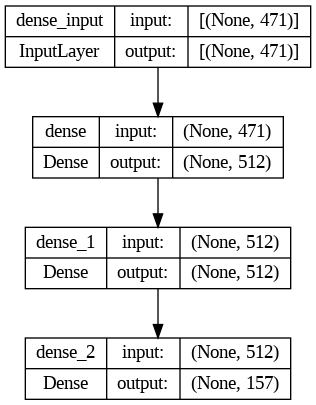

In [ ]:
# Asegúrate de tener el modelo definido, por ejemplo, 'model'
from tensorflow.keras.utils import plot_model

# Generar y visualizar la imagen del modelo
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model.png')
